# Introduction to Pandas

## 1. What is pandas?
### Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool, built on top of the Python programming language.
## 2. Why is pandas so popular?
### Pandas is the *de facto* standard in data analysis and data manipulation in Python. In the backend it stores data as NumPy arrays, which in turns gives C-like performance whilst mantaining code simplicity.
## 3. Any drawback to be aware off?
### Pandas is very memory consuming, if a .csv file is X MB, you should expect pandas to take around 5-10 X memory in your RAM. This becomes a problem if you want to load several GB worth of data. Hence, scalability is not ideal and other technologies should be considered to ingest GB or TB sized data streams


# Pandas Series

## Pandas series are the simplest structure available in Pandas. They, describe a dataset labelled by a index and a single column. For instance, this could be a time-series of a stock price. 

### To create a DataFrame we use the method ```pd.Series()``` (https://pandas.pydata.org/docs/reference/api/pandas.Series.html)

### One of the easyest ways to create a Series is using a dictionary. The keys of the dictionary will be transformed into indices and the values will be the corresponding values

In [1]:
import pandas as pd
print(pd.__version__)

2.3.3


In [2]:
my_series=pd.Series(data={"a":1,"b":2,"c":3})
my_series

a    1
b    2
c    3
dtype: int64

### One can create more complex series by feeding the index and data separately

In [3]:
import pandas as pd
import numpy as np
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,200)

df = pd.Series(data=stock_value, index=dates, name='stock_price')

print(df)
print(type(df))

2020-01-01     99.789782
2020-01-02    100.123015
2020-01-03     99.733510
2020-01-04    100.294133
2020-01-05    100.312305
                 ...    
2020-07-14     99.624009
2020-07-15     99.854869
2020-07-16     99.063007
2020-07-17    101.253710
2020-07-18     99.177867
Freq: D, Name: stock_price, Length: 200, dtype: float64
<class 'pandas.core.series.Series'>


### We can access the index attribute using the ```.index``` attribute and we can access the values using the ```.values``` attribute

In [4]:
df.index

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2020-07-09', '2020-07-10', '2020-07-11', '2020-07-12',
               '2020-07-13', '2020-07-14', '2020-07-15', '2020-07-16',
               '2020-07-17', '2020-07-18'],
              dtype='datetime64[ns]', length=200, freq='D')

In [5]:
df.values

array([ 99.78978232, 100.12301517,  99.73351021, 100.2941325 ,
       100.31230539,  99.02113281, 100.01714221, 100.06798362,
       100.54172561,  99.4974149 , 100.24286513,  98.92762377,
        98.74496147, 101.46798476,  99.82092029, 100.9686122 ,
       101.55346743,  98.83319004,  98.7301419 , 100.30435709,
        98.74915793, 101.41881871,  99.41505311, 100.77606353,
       100.49521767, 100.70904211,  99.27681637, 100.24046569,
       100.97045627,  99.88343565, 100.94846323, 101.08656999,
        99.57958305, 101.15988235, 101.13795825, 100.00284661,
        98.58850648, 100.27961   ,  98.41661898, 100.59247797,
       101.56976844,  99.80481345, 100.69406466, 100.05258665,
       100.3201652 ,  99.10811117,  99.85511188, 100.19451337,
        99.2286884 , 100.97637737,  98.32698651, 102.03271885,
        99.82840617, 100.15111827, 100.5378082 ,  98.8995236 ,
       100.03469554, 101.43411596, 101.03937582,  99.5785858 ,
       100.49219912,  99.16338185, 100.93602418,  99.67

### To access elements of the series, we can use slicing similar to numpy arrays and lists. The big difference is that we need to use the index keys to access elements or ranges

In [6]:
print(df[::2])#valid
print("----------------")
print(df[:-10])
print("----------------")
print(df[1:-10])

2020-01-01     99.789782
2020-01-03     99.733510
2020-01-05    100.312305
2020-01-07    100.017142
2020-01-09    100.541726
                 ...    
2020-07-09     99.646447
2020-07-11    100.179618
2020-07-13     99.795534
2020-07-15     99.854869
2020-07-17    101.253710
Freq: 2D, Name: stock_price, Length: 100, dtype: float64
----------------
2020-01-01     99.789782
2020-01-02    100.123015
2020-01-03     99.733510
2020-01-04    100.294133
2020-01-05    100.312305
                 ...    
2020-07-04     99.498466
2020-07-05    102.448987
2020-07-06     99.471617
2020-07-07    101.818089
2020-07-08    101.413283
Freq: D, Name: stock_price, Length: 190, dtype: float64
----------------
2020-01-02    100.123015
2020-01-03     99.733510
2020-01-04    100.294133
2020-01-05    100.312305
2020-01-06     99.021133
                 ...    
2020-07-04     99.498466
2020-07-05    102.448987
2020-07-06     99.471617
2020-07-07    101.818089
2020-07-08    101.413283
Freq: D, Name: stock_price, 

### We can also range with dates, since they are the index

In [7]:
df['2020-01-01':'2020-04-03']

2020-01-01     99.789782
2020-01-02    100.123015
2020-01-03     99.733510
2020-01-04    100.294133
2020-01-05    100.312305
                 ...    
2020-03-30    100.222464
2020-03-31     99.676082
2020-04-01     99.297427
2020-04-02    101.544320
2020-04-03    100.757071
Freq: D, Name: stock_price, Length: 94, dtype: float64

### If we want to access scalar values we either use the correct index or the ```.at[index]``` method. The following are equivalent

In [8]:
%timeit df.at['2020-01-01']

8.92 μs ± 1.45 μs per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [9]:
%timeit df['2020-01-01']

10.4 μs ± 21.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [10]:
print(df['2020-01-01'])
print(df.at['2020-01-01'])

99.78978232112567
99.78978232112567


### If we want to access slices we can also use the  ```.loc[array_index]``` method. The following are equivalent

In [11]:
print(df.loc[['2020-01-01','2020-01-03']])
print(df[['2020-01-01','2020-01-03']])

2020-01-01    99.789782
2020-01-03    99.733510
Name: stock_price, dtype: float64
2020-01-01    99.789782
2020-01-03    99.733510
Name: stock_price, dtype: float64


### **Note**: Indexes can be any array of objects in python, ordered or not. See examples below

In [12]:
# We create a index with a integer list
my_index=[3,2,1]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df1 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df1)
print(type(df1))
df1.index

3    99.056284
2    99.537779
1    99.788256
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index([3, 2, 1], dtype='int64')

In [13]:
# We create a index with a integer list
my_index=["Jan","Feb","Mar"]
# And some random values for a stock
stock_value=100+np.random.normal(0,1,3)

df2 = pd.Series(stock_value, index=my_index, name='stock_price')

print(df2)
print(type(df2))
df2.index

Jan    100.904978
Feb     97.735804
Mar     98.837216
Name: stock_price, dtype: float64
<class 'pandas.core.series.Series'>


Index(['Jan', 'Feb', 'Mar'], dtype='object')

###  Pandas series offer a number of functionalities, like plotting the data in a very straightforward manner (for more info visit https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.plot.html)

<Axes: title={'center': 'Stock value'}>

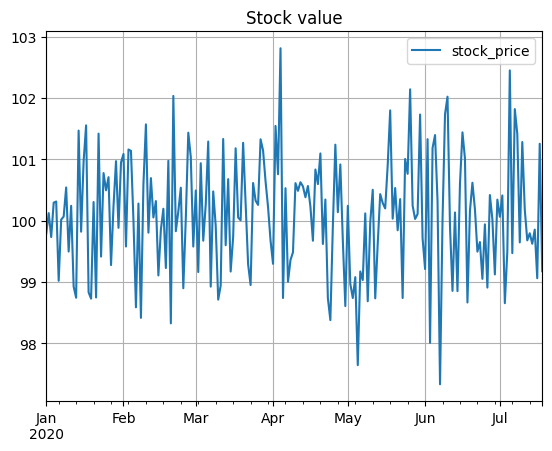

In [14]:
df.plot(title="Stock value",grid=True,legend=True)

### Another useful feature is to be able to display summary statistics of our data set using the ```.describe()```class method

In [15]:
df.describe()

count    200.000000
mean     100.091876
std        0.946576
min       97.334843
25%       99.482164
50%      100.136355
75%      100.649777
max      102.809340
Name: stock_price, dtype: float64

In [16]:
df.describe()["std"]

np.float64(0.946575517775392)

### **Note:** the desribe method returns a series as well

In [17]:
type(df.describe())

pandas.core.series.Series

### We can also display first/last n rows using ```head(n)``` or ```tail(n)``` that also return series

In [18]:
df.head(5)

2020-01-01     99.789782
2020-01-02    100.123015
2020-01-03     99.733510
2020-01-04    100.294133
2020-01-05    100.312305
Freq: D, Name: stock_price, dtype: float64

In [19]:
type(df.head(5))

pandas.core.series.Series

In [20]:
df.tail(2)

2020-07-17    101.253710
2020-07-18     99.177867
Freq: D, Name: stock_price, dtype: float64

### **Note** that ```head(n)``` or ```tail(n)``` are equivalent to slicing with ```[:n]``` or ```[-n:]``` respectively

---
# Pandas DataFrames
### Before advancing further, let's introduce the concept of a dataframe. A Pandas DataFrame is a collection of Series labelled by the same index, e.g. it could be a collection of Series of Stock prices labelled by their timestamp. 

### To create a DataFrame we use the method ```pd.DataFrame()``` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)


In [21]:
# We create a date range
dates = pd.date_range('20200101', periods=200)
# And some random values for a stock
stock_value=100+np.random.normal(0,1,(200,4))

df = pd.DataFrame(stock_value, index=dates, columns=['stock_a','stock_b','stock_c','stock_d'])

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,stock_a,stock_b,stock_c,stock_d
2020-01-01,97.279839,98.288597,99.985753,100.910142
2020-01-02,98.849572,99.878879,98.951374,99.152652
2020-01-03,98.281174,100.305671,101.099507,99.647662
2020-01-04,98.727907,99.023454,99.245731,99.041078
2020-01-05,101.263725,99.007374,98.755821,100.209349
...,...,...,...,...
2020-07-14,100.784047,99.724989,98.863933,99.345809
2020-07-15,100.128694,100.709009,100.249414,99.683811
2020-07-16,100.286501,100.632390,100.797787,100.826665
2020-07-17,100.103863,99.734190,100.837538,99.525819


### Let's have a look at some examples looking at the```yfinance``` library
#### In 2025 the YFinance API changed a bit so we need to modify the pandas dataframe that gets returned from the library to be a bit more firendly

In [22]:
import yfinance

AAPL = yfinance.download(["AAPL"],auto_adjust=False,period="5Y" ) # gets Apple's data

[*********************100%***********************]  1 of 1 completed


In [23]:
AAPL.columns.get_level_values('Price')

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object', name='Price')

In [24]:
AAPL.columns=AAPL.columns.swaplevel(0, 1)

AAPL.loc[:,('AAPL')]

Price,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-11-06,115.651070,118.690002,119.199997,116.129997,118.320000,114457900
2020-11-09,113.341743,116.320000,121.989998,116.050003,120.500000,154515300
2020-11-10,113.000702,115.970001,117.589996,114.129997,115.550003,138023400
2020-11-11,116.430573,119.489998,119.629997,116.440002,117.190002,112295000
2020-11-12,116.157753,119.209999,120.529999,118.570000,119.620003,103162300
...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600


In [25]:
#Option 2
AAPL = yfinance.download(["AAPL"],auto_adjust=False,period="5Y")
AAPL=pd.DataFrame(AAPL.values,AAPL.index,columns=AAPL.columns.get_level_values('Price').values)

[*********************100%***********************]  1 of 1 completed


In [26]:
AAPL

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-11-06,115.651054,118.690002,119.199997,116.129997,118.320000,114457900.0
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0
...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500.0
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100.0
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600.0


In [27]:
type(AAPL) # Check data typr

pandas.core.frame.DataFrame

### As mentioned, before ```yfinance``` provides us with a dataframe directly with a number of columns, that can then be accessed by typing ```dataframe.columns```, and likewise for the index, which can be accessed using  ```dataframe.index```. The values in turn, can be accessed using the attribute ```dataframe.vales```

In [28]:
AAPL.columns

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [29]:
AAPL.index


DatetimeIndex(['2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19',
               ...
               '2025-10-23', '2025-10-24', '2025-10-27', '2025-10-28',
               '2025-10-29', '2025-10-30', '2025-10-31', '2025-11-03',
               '2025-11-04', '2025-11-05'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

In [30]:
AAPL.values

array([[1.15651054e+02, 1.18690002e+02, 1.19199997e+02, 1.16129997e+02,
        1.18320000e+02, 1.14457900e+08],
       [1.13341721e+02, 1.16320000e+02, 1.21989998e+02, 1.16050003e+02,
        1.20500000e+02, 1.54515300e+08],
       [1.13000679e+02, 1.15970001e+02, 1.17589996e+02, 1.14129997e+02,
        1.15550003e+02, 1.38023400e+08],
       ...,
       [2.69049988e+02, 2.69049988e+02, 2.70850006e+02, 2.66250000e+02,
        2.70420013e+02, 5.01946000e+07],
       [2.70040009e+02, 2.70040009e+02, 2.71489990e+02, 2.67619995e+02,
        2.68329987e+02, 4.92748000e+07],
       [2.70140015e+02, 2.70140015e+02, 2.71700012e+02, 2.66929993e+02,
        2.68589996e+02, 4.03792870e+07]], shape=(1255, 6))

### ***Remark***: ```.values ``` casts a dataframe or series into a numpy array. Note that this operation will return a pure numpy array without the original index

---
# Quick comment on storing and loading dataframes
### Pandas offers a number of format compatibility like ```dataframe.to_csv``` .csv,  ```dataframe.to_pickle``` .pickle etc. The difference between picke and csv is that with pickle python will repect the types of index/values as opposed to csv where it will do a best guess

In [31]:
AAPL.to_csv('AAPL.csv',index=True)
pd.read_csv('AAPL.csv',index_col=0)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-11-06,115.651054,118.690002,119.199997,116.129997,118.320000,114457900.0
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0
...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500.0
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100.0
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600.0


### Note that we lost the type of the index

In [32]:
pd.read_csv('AAPL.csv',index_col=0).index

Index(['2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
       '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
       ...
       '2025-10-23', '2025-10-24', '2025-10-27', '2025-10-28', '2025-10-29',
       '2025-10-30', '2025-10-31', '2025-11-03', '2025-11-04', '2025-11-05'],
      dtype='object', name='Date', length=1255)

In [33]:
AAPL.to_pickle('AAPL.pickle')
pd.read_pickle('AAPL.pickle')

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2020-11-06,115.651054,118.690002,119.199997,116.129997,118.320000,114457900.0
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0
...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500.0
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100.0
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600.0


In [34]:
pd.read_pickle('AAPL.pickle').index

DatetimeIndex(['2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11',
               '2020-11-12', '2020-11-13', '2020-11-16', '2020-11-17',
               '2020-11-18', '2020-11-19',
               ...
               '2025-10-23', '2025-10-24', '2025-10-27', '2025-10-28',
               '2025-10-29', '2025-10-30', '2025-10-31', '2025-11-03',
               '2025-11-04', '2025-11-05'],
              dtype='datetime64[ns]', name='Date', length=1255, freq=None)

### Here pickle respects the original index type

---
# Back to DataFrames

## Slicing DataFrames

### Perhaps, not all the information in a dataframe is relevant to us and often case we want to either remove part of it or transform it. Let us start by selecting a single column from the dataframe above. There are a numbers of ways to do this operation:

In [35]:
# Let's assume we are interested in adjclose column in AAPL dataframe
AAPL_close=AAPL.Close # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
2020-11-06    118.690002
2020-11-09    116.320000
2020-11-10    115.970001
2020-11-11    119.489998
2020-11-12    119.209999
                 ...    
2025-10-30    271.399994
2025-10-31    270.369995
2025-11-03    269.049988
2025-11-04    270.040009
2025-11-05    270.140015
Name: Close, Length: 1255, dtype: float64

In [36]:
# Equivalently we can use 
AAPL_close=AAPL['Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
2020-11-06    118.690002
2020-11-09    116.320000
2020-11-10    115.970001
2020-11-11    119.489998
2020-11-12    119.209999
                 ...    
2025-10-30    271.399994
2025-10-31    270.369995
2025-11-03    269.049988
2025-11-04    270.040009
2025-11-05    270.140015
Name: Close, Length: 1255, dtype: float64

### We can also use the loc method, as opposed to series, for dataframes ```.loc``` takes two arguments ```.loc[array_index,array_columns]```

In [37]:
# Equivalently we can use 
AAPL_close=AAPL.loc[:,'Close'] # we can type explicitly the name of the column
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.series.Series'>


Date
2020-11-06    118.690002
2020-11-09    116.320000
2020-11-10    115.970001
2020-11-11    119.489998
2020-11-12    119.209999
                 ...    
2025-10-30    271.399994
2025-10-31    270.369995
2025-11-03    269.049988
2025-11-04    270.040009
2025-11-05    270.140015
Name: Close, Length: 1255, dtype: float64

### ***Remark***:  Slicing a dataframe into a single column returns  a Series! Slicing multiple Columns return a DataFrame!

### If we want to obtain a DataFrame as output we can use double brackets with the columns (see below)

In [38]:
AAPL_close=AAPL.loc[:,['Close']]
print(type(AAPL_close))
AAPL_close

<class 'pandas.core.frame.DataFrame'>


,Close
Date,
2020-11-06,118.690002
2020-11-09,116.320000
2020-11-10,115.970001
2020-11-11,119.489998
2020-11-12,119.209999
...,...
2025-10-30,271.399994
2025-10-31,270.369995
2025-11-03,269.049988


In [39]:
AAPL[['Close']]

,Close
Date,
2020-11-06,118.690002
2020-11-09,116.320000
2020-11-10,115.970001
2020-11-11,119.489998
2020-11-12,119.209999
...,...
2025-10-30,271.399994
2025-10-31,270.369995
2025-11-03,269.049988


In [40]:
#Let's slice high and low
AAPL_high_low=AAPL.loc[:,['Low','High']]
print(type(AAPL_high_low))
AAPL_high_low

<class 'pandas.core.frame.DataFrame'>


,Low,High
Date,,
2020-11-06,116.129997,119.199997
2020-11-09,116.050003,121.989998
2020-11-10,114.129997,117.589996
2020-11-11,116.440002,119.629997
2020-11-12,118.570000,120.529999
...,...,...
2025-10-30,268.480011,274.140015
2025-10-31,269.160004,277.320007
2025-11-03,266.250000,270.850006


## Slicing using integer indexing

### Sometimes we might not care about the specific name that a column has or the especific indexing convention e.g. we might just be interest in the 1st value of the 1st column. We can use the ```.iloc``` (integer locator) method to access such elements using the convention ```.iloc[array_integer_index,array_integer_columns]``` same **as if we where slicing a 2D numpy array**

In [41]:
AAPL.iloc[:,2]# all rows only 3rd column

Date
2020-11-06    119.199997
2020-11-09    121.989998
2020-11-10    117.589996
2020-11-11    119.629997
2020-11-12    120.529999
                 ...    
2025-10-30    274.140015
2025-10-31    277.320007
2025-11-03    270.850006
2025-11-04    271.489990
2025-11-05    271.700012
Name: High, Length: 1255, dtype: float64

In [42]:
AAPL.iloc[2,:]# 3rd row all columns

Adj Close    1.130007e+02
Close        1.159700e+02
High         1.175900e+02
Low          1.141300e+02
Open         1.155500e+02
Volume       1.380234e+08
Name: 2020-11-10 00:00:00, dtype: float64

In [43]:
AAPL.iloc[2:4,2:4]# 3-4 rows and 3-4 columns

,High,Low
Date,,
2020-11-10,117.589996,114.129997
2020-11-11,119.629997,116.440002


---
# ```.loc``` vs ```.at```  | ```.iloc``` vs ```.iat```

### What is the difference between ```.loc``` and ```.at```? ```loc``` returns either a scalar value or an array, whereas ```at``` only works for scalar retrieval

### What is the difference between ```.iloc``` and ```.iat```? ```iloc``` returns either a scalar value or an array, whereas ```iat``` only works for scalar retrieval

In [44]:
AAPL.loc[:,"Close"]

Date
2020-11-06    118.690002
2020-11-09    116.320000
2020-11-10    115.970001
2020-11-11    119.489998
2020-11-12    119.209999
                 ...    
2025-10-30    271.399994
2025-10-31    270.369995
2025-11-03    269.049988
2025-11-04    270.040009
2025-11-05    270.140015
Name: Close, Length: 1255, dtype: float64

In [45]:
AAPL.at[:,"Close"]#Not allowed because it returns an array

InvalidIndexError: slice(None, None, None)

In [46]:
%timeit AAPL.at["2023-10-30","Close"]

11.5 μs ± 69.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [47]:
%timeit AAPL.loc["2023-10-30","Close"]

36.6 μs ± 258 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


### **Note**: ```iat``` and ```at``` are much more performant for scalar value retrieval 

---
# Creating new columns
### To create new columns we simply write the name of the new column in square brackets ```DataFrame["new_column_name"]=values``` and assign a value e.g

In [48]:
AAPL["log_stock_close"]=np.log(AAPL.Close)

In [49]:
AAPL.head(5)

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-11-06,115.651054,118.690002,119.199997,116.129997,118.320000,114457900.0,4.776515
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0,4.756345
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0,4.753332
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0,4.783233
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0,4.780887


### Note that we need to assign an array with the same length otherwise it will throw an error:

In [50]:
AAPL['log_stock_close']=np.array([1,2]) #Not valid

ValueError: Length of values (2) does not match length of index (1255)

# Some useful functions
### Pandas provides mean, std,sum,min,max... and a number of functions that can be applied to both axis, similar to numpy

In [51]:
AAPL.mean(axis=0) #mean across columns

Adj Close          1.750326e+02
Close              1.769394e+02
High               1.786934e+02
Low                1.749980e+02
Open               1.767635e+02
Volume             7.163852e+07
log_stock_close    5.154479e+00
dtype: float64

In [52]:
AAPL.std(axis=0) #std across columns

Adj Close          3.772238e+01
Close              3.688420e+01
High               3.707684e+01
Low                3.659515e+01
Open               3.682969e+01
Volume             3.048348e+07
log_stock_close    2.060996e-01
dtype: float64

In [53]:
AAPL.sum(axis=0) #sum across columns

Adj Close          2.196659e+05
Close              2.220589e+05
High               2.242602e+05
Low                2.196225e+05
Open               2.218382e+05
Volume             8.990635e+10
log_stock_close    6.468871e+03
dtype: float64

In [54]:
AAPL.min(axis=0) #minimum value across columns

Adj Close          1.109350e+02
Close              1.138500e+02
High               1.158500e+02
Low                1.125900e+02
Open               1.139100e+02
Volume             2.323470e+07
log_stock_close    4.734882e+00
dtype: float64

In [55]:
AAPL.max(axis=0) #minimum value across columns

Adj Close          2.714000e+02
Close              2.714000e+02
High               2.773200e+02
Low                2.691600e+02
Open               2.769900e+02
Volume             3.186799e+08
log_stock_close    5.603594e+00
dtype: float64

---
# Boolean slicing

### We can also slice a dataframe whenever a boolean condition is satisfied. To do so we can use the ```.loc[boolean_array,columns_array]``` method 

In [56]:
# Filter data by volume
boolean_condition=AAPL.Volume>400000000
print(boolean_condition)
AAPL.loc[boolean_condition,:]

Date
2020-11-06    False
2020-11-09    False
2020-11-10    False
2020-11-11    False
2020-11-12    False
              ...  
2025-10-30    False
2025-10-31    False
2025-11-03    False
2025-11-04    False
2025-11-05    False
Name: Volume, Length: 1255, dtype: bool


,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,


---
# Chaining multiple boolean conditions with the keyword ```&```

### If we want to concatenate mutiple condition we need to use the **bitwise and** operator defined by ```&```
### If we want to concatenate mutiple alternative condition we need to use the **bitwise or** operator defined by ```|```

In [57]:
# Filter data by volume
boolean_condition1=AAPL.Volume>4000000
boolean_condition2=AAPL.Volume<90000000

AAPL.loc[boolean_condition1 & boolean_condition2,:]

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-11-13,116.206467,119.260002,119.669998,117.870003,119.440002,81581900.0,4.781306
2020-11-17,116.333130,119.389999,120.669998,118.959999,119.550003,74271000.0,4.782395
2020-11-18,115.007950,118.029999,119.820000,118.000000,118.610001,76322100.0,4.770939
2020-11-19,115.602325,118.639999,119.059998,116.809998,117.589996,74113000.0,4.776094
2020-11-20,114.335625,117.339996,118.769997,117.290001,118.639999,73604300.0,4.765076
...,...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500.0,5.603594
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100.0,5.599791
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600.0,5.594897


---
# DataFrames and mutability (from the official documentation (https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html)

### All pandas data structures are value-mutable (the values they contain can be altered) but not always size-mutable. The length of a Series cannot be changed, but, for example, columns can be inserted into a DataFrame. However, the vast majority of methods produce new objects and leave the input data untouched. In general we like to favor immutability where sensible.


### What is important is to keep in mind that the backend of DataFrames are numpy arrays and the rules for mutability apply similarly. Let's see some examples:

In [58]:
df2=AAPL
print(AAPL.iloc[0,0])
df2.iloc[0,0]=0
print(AAPL.iloc[0,0])

115.65105438232422
0.0


In [59]:
df2

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-11-06,0.000000,118.690002,119.199997,116.129997,118.320000,114457900.0,4.776515
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0,4.756345
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0,4.753332
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0,4.783233
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0,4.780887
...,...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500.0,5.603594
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100.0,5.599791
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600.0,5.594897


In [60]:
AAPL

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-11-06,0.000000,118.690002,119.199997,116.129997,118.320000,114457900.0,4.776515
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0,4.756345
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0,4.753332
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0,4.783233
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0,4.780887
...,...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500.0,5.603594
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100.0,5.599791
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600.0,5.594897


In [61]:
#Exactly the same problem as arrays
a=np.array([1,2,3])
b=a
b[0]=10
print(a[0])

10


### As you can see copies of dataframes are mutable in the value, so one needs to be careful when making copies and modifying them as it also changes the root values. You can sort this out, by using the  ```.copy() ``` method

In [62]:
df2=AAPL.copy()
print(AAPL.iloc[1,0])
df2.iloc[1,0]=0
print(AAPL.iloc[1,0])

113.34172058105469
113.34172058105469


In [63]:
AAPL.index[0]="1980-11-11"

TypeError: Index does not support mutable operations

### Indices on the other hand, are inmutable. This means that if we want to make a change to the index we need to redefine the entire index
---

#  info(), describe() and plot()
### Similar to pandas Series we can use describe and plot methods on DataFames as well as info

#### We discussed in the beginning of the session that Pandas has significant memory consumption, let´s check that

In [116]:
import sys
print(f" Size of Numpy values: {sys.getsizeof(AAPL.values.copy())/1000:.2f} KB")
print(f" Size of pandas dataframe: {sys.getsizeof(AAPL)/1000:.2f} KB")

 Size of Numpy values: 40.29 KB
 Size of pandas dataframe: 83.30 KB


### As you can see the pandas object takes twice as much space, we can compara these values with the methods that arrays and dataframes provide to estimate the memory consumption

In [115]:
print(f"Numpy nbytes size estimate {AAPL.values.nbytes/1000:.2f}KB")

Numpy nbytes size estimate 40.16KB


In [98]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2020-11-06 to 2025-11-05
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
dtypes: float64(4)
memory usage: 81.3 KB


#### Numpy and pandas estimates are slightly smaller, but reanonably close. The info() method above gives high level information about the dataframe, like data types non-null count etc.

In [65]:
AAPL.describe()

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
count,1255.000000,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03,1255.000000
mean,174.940464,176.939386,178.693363,174.998048,176.763482,7.163852e+07,5.154479
std,38.007740,36.884196,37.076843,36.595149,36.829688,3.048348e+07,0.206100
min,0.000000,113.849998,115.849998,112.589996,113.910004,2.323470e+07,4.734882
25%,144.587250,147.065002,148.850006,145.644997,147.060005,4.933490e+07,4.990875
50%,170.148148,172.389999,173.740005,170.750000,171.990005,6.488540e+07,5.149759
75%,202.088043,202.450005,205.519997,200.385002,203.050003,8.682590e+07,5.310493
max,271.399994,271.399994,277.320007,269.160004,276.989990,3.186799e+08,5.603594


<Axes: title={'center': 'AAPL daily OHLCV'}, xlabel='Date'>

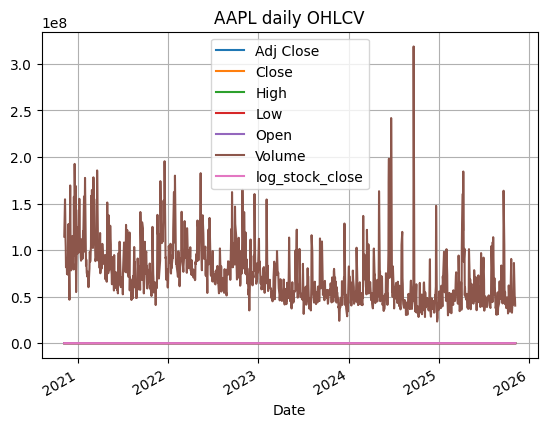

In [66]:
#AAPL_high_low=AAPL.loc[dates_2019,['low','high']]
#print(type(AAPL_high_low))
#Plot the data
AAPL.plot(grid=True,title='AAPL daily OHLCV')

### The scale of the different columns is an issues here, but we can select the columns that we care about to make a cleaner plot

<Axes: title={'center': 'AAPL daily OHLC'}, xlabel='Date'>

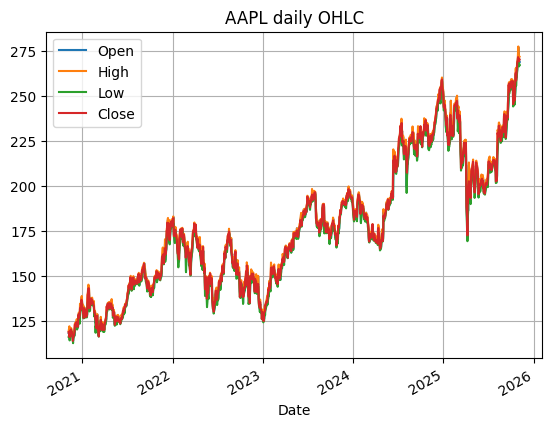

In [67]:
AAPL[["Open","High","Low","Close"]].plot(grid=True,title='AAPL daily OHLC')

###  We will see more on plotting later, but this gives a simple tool to visualize quickly a dataset
---

# Dates and Time slicing

### The python standard library includes ```datetime``` module to handle dates. We can create any date using the method ```datetime.datetime(year,month,day)```

In [68]:
import datetime
import numpy as np
#I strongly recommend to have a look at datetime module as you will be often dealing with this when using time-series data 
date=datetime.datetime(2020, 5, 17)
print(date.year)
print(date.month)
print(date.day)

2020
5
17


### If we want to select a range of dates we can use boolean slicing with datetime objects

In [69]:
#Not allowed
AAPL.index>=datetime.datetime(2019, 1, 1)

array([ True,  True,  True, ...,  True,  True,  True], shape=(1255,))

### Note that in some previous Numpy 2.X versions this operation failed. Seems that it works back, make sure you are using the right versioning.

## The way to slice by date is using string in the form "YYYY-MM-DD"

In [70]:
dates_2019=AAPL.index[(AAPL.index>="2023-01-01") & (AAPL.index<"2024-01-01")]

<class 'pandas.core.frame.DataFrame'>


<Axes: title={'center': 'AAPL 2019 daily high and low'}, xlabel='Date'>

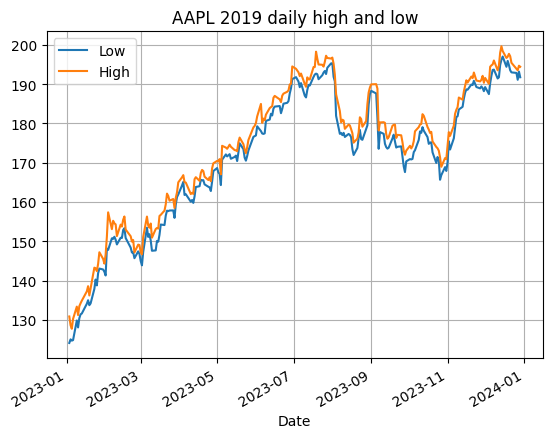

In [71]:
import datetime
# We select just 2019 dates
dates_2019=AAPL.index[(AAPL.index>="2023-01-01") & (AAPL.index<"2024-01-01")]
#We slice the dataframe
AAPL_high_low=AAPL.loc[dates_2019,['Low','High']]
print(type(AAPL_high_low))
#Plot the data
AAPL_high_low.plot(grid=True,title='AAPL 2019 daily high and low')

## **Remark**: The reason why we use datetime objects is because the index is also a datetime object, which is the default index in yfinance. However, if dates are represented as strings, once use string comparison (see below) since dates follow lexicographic ordering, which is the default comparison straegy for strings

In [72]:
date="2022-02-02"

print(date>"2023-02-02")

print(date>"2021-01-01")

False
True


In [73]:
string_index=AAPL.index.astype(str)#cast datetime to string
string_index

Index(['2020-11-06', '2020-11-09', '2020-11-10', '2020-11-11', '2020-11-12',
       '2020-11-13', '2020-11-16', '2020-11-17', '2020-11-18', '2020-11-19',
       ...
       '2025-10-23', '2025-10-24', '2025-10-27', '2025-10-28', '2025-10-29',
       '2025-10-30', '2025-10-31', '2025-11-03', '2025-11-04', '2025-11-05'],
      dtype='object', name='Date', length=1255)

In [74]:
string_index>"2023-01-01"# we can use string comparisson

array([False, False, False, ...,  True,  True,  True], shape=(1255,))

### It doesn't really matter which date representation you use (either python datetime or string), **but be aware of the difference!!!**
---

# Some useful functions for financial applications: Diff, Shift and pct_change()
### ```dataframe.diff(n)``` computes the difference with respect to the tow n postitions below. Shift ```dataframe.shift(n)``` displaces the dataframe $n$ rows down. ```dataframe.pct_change()``` computes returns

In [75]:
AAPL

,Adj Close,Close,High,Low,Open,Volume,log_stock_close
Date,,,,,,,
2020-11-06,0.000000,118.690002,119.199997,116.129997,118.320000,114457900.0,4.776515
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0,4.756345
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0,4.753332
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0,4.783233
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0,4.780887
...,...,...,...,...,...,...,...
2025-10-30,271.399994,271.399994,274.140015,268.480011,271.989990,69886500.0,5.603594
2025-10-31,270.369995,270.369995,277.320007,269.160004,276.989990,86167100.0,5.599791
2025-11-03,269.049988,269.049988,270.850006,266.250000,270.420013,50194600.0,5.594897


In [76]:
AAPL.Close.diff(1)

Date
2020-11-06         NaN
2020-11-09   -2.370003
2020-11-10   -0.349998
2020-11-11    3.519997
2020-11-12   -0.279999
                ...   
2025-10-30    1.699982
2025-10-31   -1.029999
2025-11-03   -1.320007
2025-11-04    0.990021
2025-11-05    0.100006
Name: Close, Length: 1255, dtype: float64

In [77]:
AAPL.Close.shift(1)

Date
2020-11-06           NaN
2020-11-09    118.690002
2020-11-10    116.320000
2020-11-11    115.970001
2020-11-12    119.489998
                 ...    
2025-10-30    269.700012
2025-10-31    271.399994
2025-11-03    270.369995
2025-11-04    269.049988
2025-11-05    270.040009
Name: Close, Length: 1255, dtype: float64

In [78]:
AAPL['daily_return'] = AAPL["Close"].pct_change()

In [79]:
AAPL.head()

,Adj Close,Close,High,Low,Open,Volume,log_stock_close,daily_return
Date,,,,,,,,
2020-11-06,0.000000,118.690002,119.199997,116.129997,118.320000,114457900.0,4.776515,NaN
2020-11-09,113.341721,116.320000,121.989998,116.050003,120.500000,154515300.0,4.756345,-0.019968
2020-11-10,113.000679,115.970001,117.589996,114.129997,115.550003,138023400.0,4.753332,-0.003009
2020-11-11,116.430580,119.489998,119.629997,116.440002,117.190002,112295000.0,4.783233,0.030353
2020-11-12,116.157745,119.209999,120.529999,118.570000,119.620003,103162300.0,4.780887,-0.002343


----
# Iterating over Dataframe rows
### Sometime our analysis requires to go row by row in a dataframe to perform a numerical operation. To do this we can use ```iterrows``` or ```itertuples``` . ```iterrows``` returns a (index,row) tuple whereas ```itertuples``` returns a objects whose index attribute gives the index and the rest of the atributes follow the column names

In [80]:
import time
high_low_mid=np.zeros(len(AAPL))
i=0
start_time=time.time()
for index,row in AAPL.iterrows():
    high_low_mid[i]=0.5*(row.High+row.Low)
    i+=1
print("iterrows took", time.time()-start_time,"seconds")

iterrows took 0.02657794952392578 seconds


In [81]:
print(high_low_mid)

[117.6649971  119.02000046 115.8599968  ... 268.55000305 269.55499268
 269.31500244]


In [82]:
high_low_mid=np.zeros(len(AAPL))
index=0
start_time=time.time()
for row in AAPL.itertuples():    
    high_low_mid[index]=0.5*(row.High+row.Low)
    index+=1
print("itertuples took", time.time()-start_time,"seconds")

itertuples took 0.002592802047729492 seconds


In [83]:
print(high_low_mid)

[117.6649971  119.02000046 115.8599968  ... 268.55000305 269.55499268
 269.31500244]


### **Note:** If going row by row is necessary (as we will see in a minute, vectorisation is always preferred), most of the time `itertuples` is much more efficient 
---

# Vectorisation in DataFrame Columns and slices
### As mentioned in the beginning of the session, internally Pandas stores the data as numpy arrays. Hence, we can make use of vectorisation to speed up computations

In [84]:
%timeit high_low_mid=0.5*(AAPL.High+AAPL.Low)

62.2 μs ± 11.8 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [85]:
high_low_mid=0.5*(AAPL.High+AAPL.Low)
high_low_mid.values

array([117.6649971 , 119.02000046, 115.8599968 , ..., 268.55000305,
       269.55499268, 269.31500244], shape=(1255,))

In [86]:
#We can apply the same pinciple if we want a slice corresponding to 2019 data

dates_2019=AAPL.index[(AAPL.index>="2019-01-01") & (AAPL.index<"2020-01-01")]

%timeit high_low_mid_2019=0.5*(AAPL.High[dates_2019]+AAPL.Low[dates_2019])# gives some performance improvement

%timeit high_low_mid_2019=0.5*(AAPL.loc[dates_2019,'High']+AAPL.loc[dates_2019,'Low'])



268 μs ± 2.58 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
309 μs ± 49.7 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


---
# Complex functions and  ```apply```
### Using ```dataframe.apply``` we can vectorise any user-defined function that supports vectorisation and apply it indexwise (axis=1) or columnwise (axis=0). One can further optimize the method by setting ```raw=True``` which will make the assumption that objects are numpy arrays internally

In [87]:
AAPL=AAPL.loc[:,['Open','High','Low','Close']]

In [88]:
# Columnwuse
def my_func(x):
    # Function will be applied columnwise x represents the entire column
    return x.max() -x.min() 

%timeit AAPL.apply(my_func,axis=0,raw=False)
%timeit AAPL.apply(my_func,axis=0,raw=True)

AAPL.apply(my_func,axis=0,raw=True)# For each column do maximum -minimum value
    

236 μs ± 4.53 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
59.7 μs ± 498 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


Open     163.079987
High     161.470009
Low      156.570007
Close    157.549995
dtype: float64

In [89]:
def my_func_high_low_mid(x):
    
     # Function will be applied rowise, x the entire 
    return 0.5*(x.High+x.Low) #here we assume x mantains the column structure

def my_func_high_low_mid2(x):
    # Function will be applied rowise, x the entire row casted to numpy array
    return 0.5*(x[1]+x[2]) # We need to use integer slicing

%timeit AAPL.apply(my_func_high_low_mid,axis=1,raw=False)
%timeit AAPL.apply(my_func_high_low_mid2,axis=1,raw=True)

10.3 ms ± 50.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.09 ms ± 26.7 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### As you can see ```raw=True``` can give dramatic performance improvements as data will be treated as a numpy array